In [317]:
library(RSNNS)
library(NeuralNetTools)
n=2000
#set.seed(1)

In [318]:
# more complex example with "islands", A and B scattered around alternative nodes on a grid
sig=0.1

In [319]:
x0=sample(seq(0,4,by=1),2*n, replace=T)
y0=sample(seq(0,4,by=1),2*n, replace=T)
x=x0+rnorm(2*n)*sig
y=y0+rnorm(2*n)*sig
t=ifelse(2*floor((x0+y0)/2)==(x0+y0),1,0)
trai=data.frame(x,y,t)
colnames(trai)=c("x","y","tr")
# mix
nc=ncol(trai)
dt=trai[sample(1:nrow(trai),length(1:nrow(trai))),1:nc]
Values <- dt[,1:nc-1]
Targets <- dt[,nc]
# test/validation
trts <- splitForTrainingAndTest(Values, Targets, ratio=0.15)
dt=trts
str(dt)

List of 4
 $ inputsTrain : num [1:3400, 1:2] 3.117 1.926 3.016 1.083 0.193 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3400] "507" "3828" "3735" "2489" ...
  .. ..$ : chr [1:2] "x" "y"
 $ targetsTrain: num [1:3400] 0 1 0 0 0 0 0 0 1 1 ...
 $ inputsTest  : num [1:600, 1:2] 2.0341 3.8564 0.9503 0.0262 1.9527 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:600] "2832" "2666" "1574" "1432" ...
  .. ..$ : chr [1:2] "x" "y"
 $ targetsTest : num [1:600] 0 0 0 0 1 0 0 0 0 0 ...


In [325]:
#model <- mlp(trai[1:2],trai$tr,size=10,outputActFunc = "Act_Logistic",learnFuncParams = c(0.1), maxit = 100)
#http://www.ra.cs.uni-tuebingen.de/SNNS/UserManual/node52.html
model <- mlp(dt$inputsTrain,dt$targetsTrain,size=c(10),
             inputsTest = dt$inputsTest, targetsTest = dt$targetsTest,
             outputActFunc = "Act_Logistic",
             learnFunc = "Std_Backpropagation",learnFuncParams = c(0.1),
#             learnFunc = "BackpropMomentum",learnFuncParams = c(0.1,0.1), 
#             learnFunc = "SCG", learnFuncParams = c(0.1),
              maxit = 2000)
summary(model)

SNNS network definition file V1.4-3D
generated at Mon Jan  9 12:01:04 2023

network name : RSNNS_untitled
source files :
no. of units : 13
no. of connections : 30
no. of unit types : 0
no. of site types : 0


learning function : Std_Backpropagation
update function   : Topological_Order


unit default section :

act      | bias     | st | subnet | layer | act func     | out func
---------|----------|----|--------|-------|--------------|-------------
 0.00000 |  0.00000 | i  |      0 |     1 | Act_Logistic | Out_Identity 
---------|----------|----|--------|-------|--------------|-------------


unit definition section :

no. | typeName | unitName    | act      | bias     | st | position | act func     | out func | sites
----|----------|-------------|----------|----------|----|----------|--------------|----------|-------
  1 |          | Input_x     |  4.02336 | -0.22215 | i  |  1, 0, 0 | Act_Identity |          | 
  2 |          | Input_y     |  1.12585 |  0.21606 | i  |  2, 0, 0 | Act_I

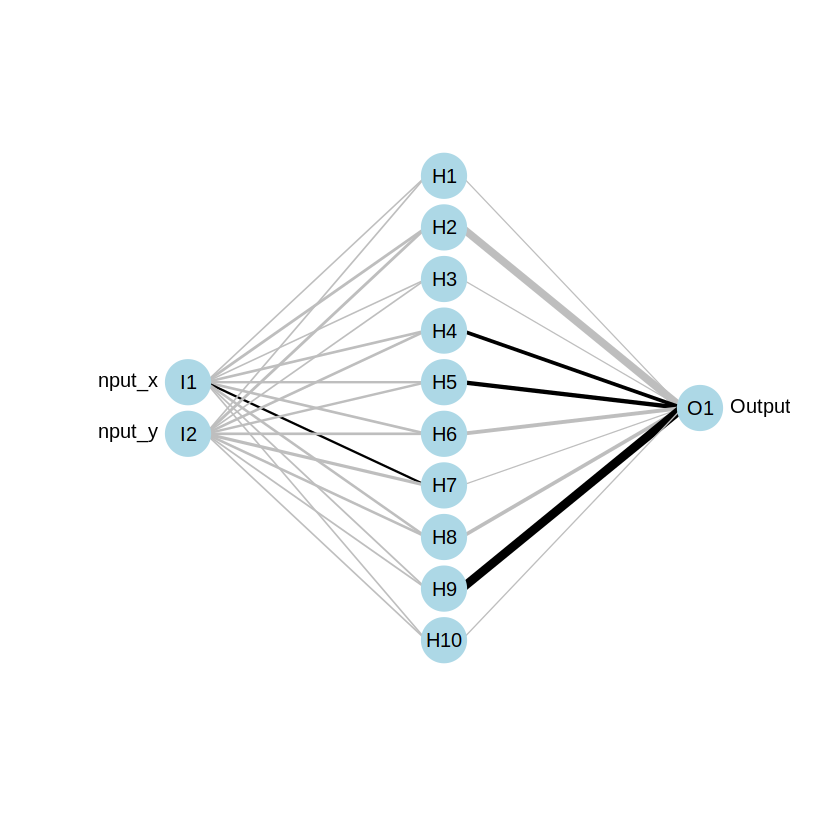

In [326]:
plotnet(model)

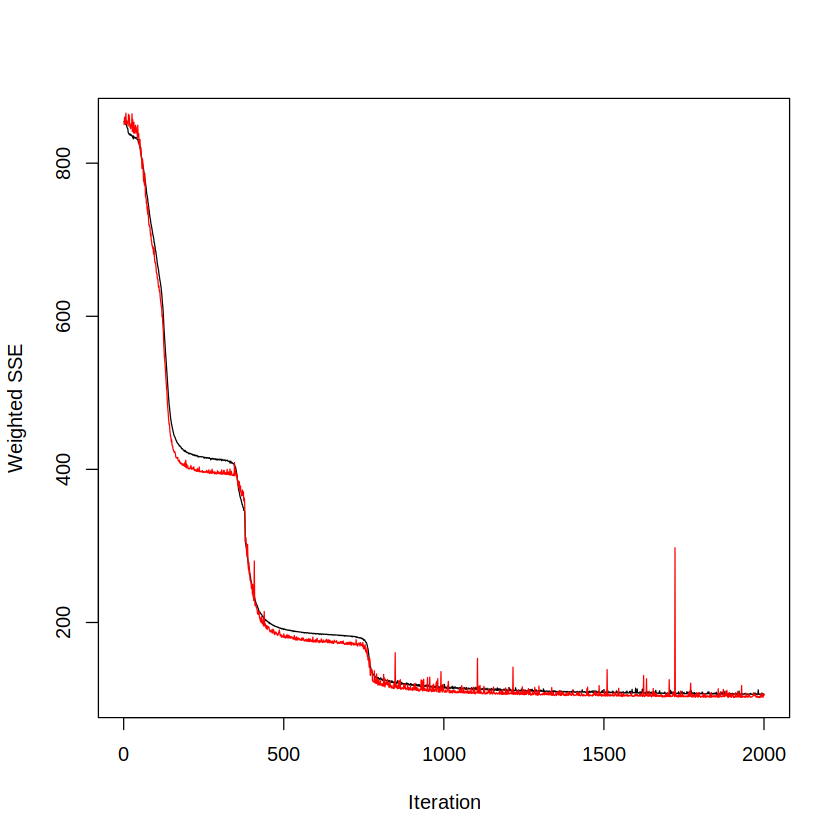

In [327]:
plotIterativeError(model)

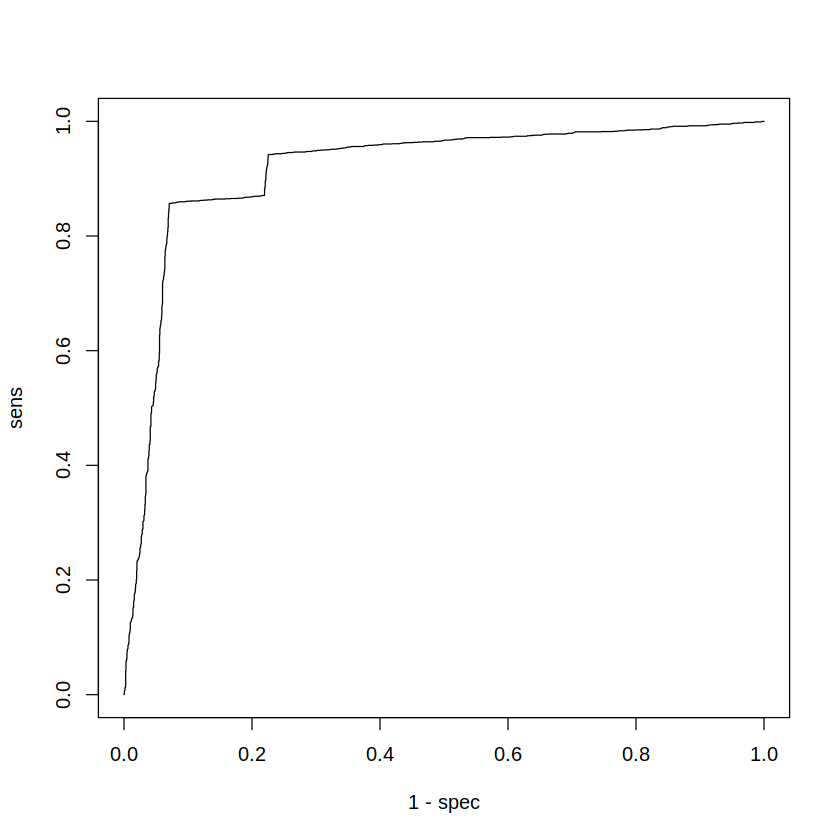

In [328]:
plotROC(model$fitted.values,Targets)

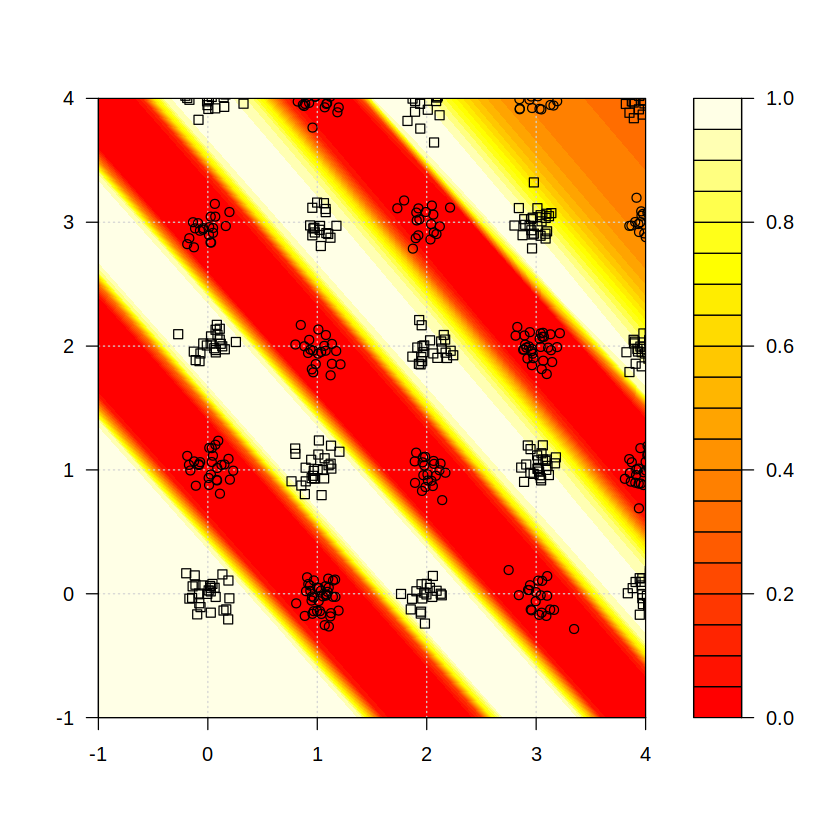

In [329]:
xn=seq(-1,4,by=0.1)
yn=seq(-1,4,by=0.1)
out=outer(xn,yn,function(x,y){predict(model,data.frame(x,y))})
xp=dt$inputsTest[,1]
yp=dt$inputsTest[,2]
sa=dt$targetsTest==0
sb=dt$targetsTest==1
xa=xp[sa]
ya=yp[sa]
xb=xp[sb]
yb=yp[sb]
filled.contour(xn,yn,out,color=heat.colors,plot.axes={axis(1);axis(2);grid();lines(xa,ya,type="p");lines(xb,yb,type="p",pch=0)})

1 0 
0.08278146 0.9172185 


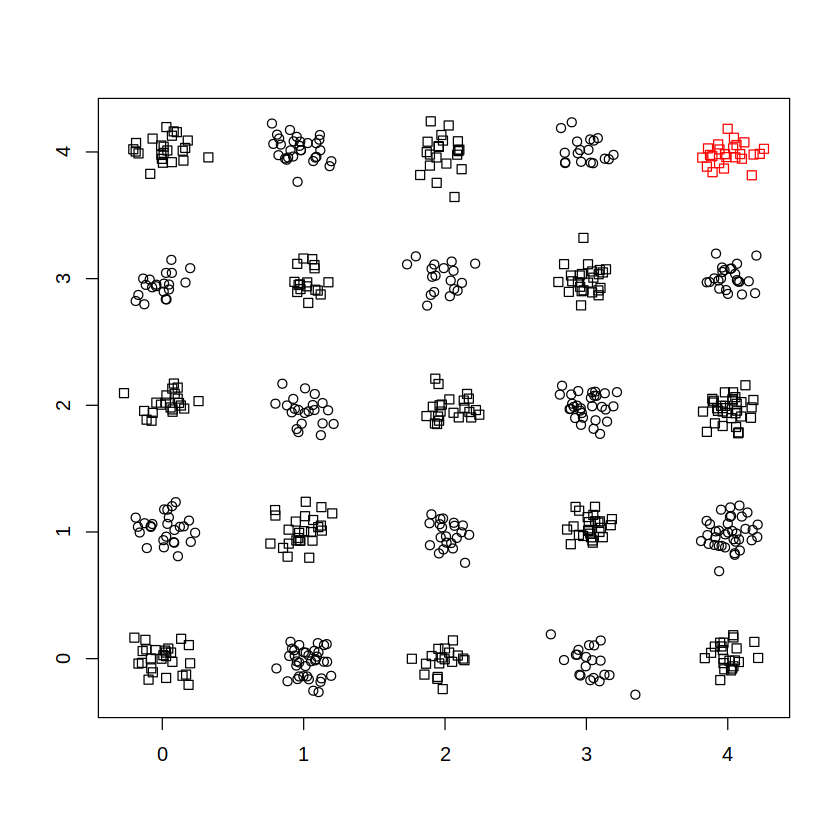

In [330]:
A=model$fittedTestValues[sa]<0.5
B=model$fittedTestValues[sa]>0.5
Ab=model$fittedTestValues[sb]<0.5
Bb=model$fittedTestValues[sb]>0.5
plot(xa[A],ya[A],xlim=range(xp),ylim=range(yp),xlab="",ylab="")
lines(xa[B],ya[B],col="red",type="p")
lines(xb[Ab],yb[Ab],pch=0,col="red",type="p")
lines(xb[Bb],yb[Bb],pch=0,type="p")
#efficiency matrix
tA=sum(sa)
tB=sum(sb)
cat(sum(A)/tA,sum(B)/tA,"\n")
cat(sum(Ab)/tB,sum(Bb)/tB,"\n")

$names
 [1] "nInputs"               "maxit"                 "initFunc"             
 [4] "initFuncParams"        "learnFunc"             "learnFuncParams"      
 [7] "updateFunc"            "updateFuncParams"      "shufflePatterns"      
[10] "computeIterativeError" "snnsObject"            "archParams"           
[13] "IterativeFitError"     "IterativeTestError"    "fitted.values"        
[16] "fittedTestValues"      "nOutputs"             

$class
[1] "mlp"   "rsnns"

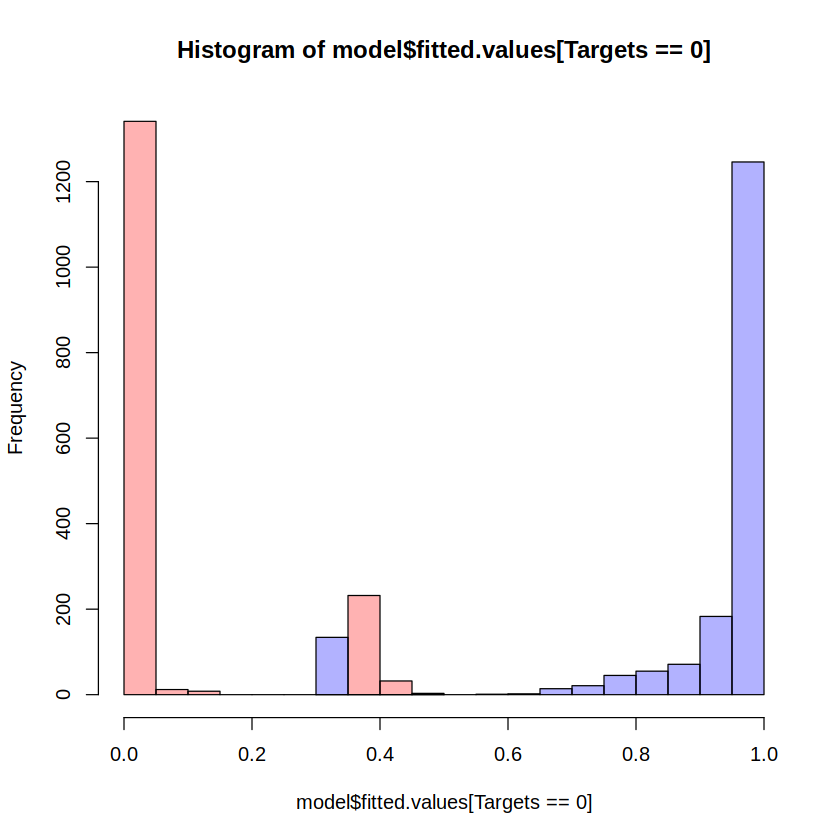

In [331]:
attributes(model)
hist(model$fitted.values[Targets==0],col=rgb(1,0,0,0.3),xlim=c(0,1))
hist(model$fitted.values[Targets==1],col=rgb(0,0,1,0.3),add=T)